# LA 4

Name: Pranav Gopalkrishna

Reg. no.: 1940223

Class: 3 CMS

## Question 1

Evaluate $y = \sum\limits_{n=1}^\infty = \frac{(-1)^n x^{2n + 1}}{2n + 1}$ for 10 terms

In [18]:
from sympy import Symbol, init_printing, pprint

In [19]:
# To intialise the printing such that in the output, lower powers come first...
init_printing(order = 'rev-lex') 
# Now the rest of the operations...
x = Symbol('x')
series = -(x**3)/3
for i in range (2, 11):
    series = series + ((-1)**i) * (x**(2*i + 1)) / (2*i + 1)
pprint(series)

   3    5    7    9    11    13    15    17    19    21
  x    x    x    x    x     x     x     x     x     x  
- ── + ── - ── + ── - ─── + ─── - ─── + ─── - ─── + ───
  3    5    7    9     11    13    15    17    19    21


## Question 2

Write a Python program to calculate sine function using series expansion and plot it.

Maclauring expansion of sin(x) is

$x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + ...$

In [16]:
from sympy import Symbol
import matplotlib.pyplot as plt

In [11]:
def factorial(n):
    fact = int(1)
    for i in range(2, n + 1):
        fact = fact * i
    return fact

In [67]:
x = Symbol('x')
sine = x
for i in range(1, 100): 
# I chose 101 because the accuracy does not improve anymore 
# for 16 decimal places after i = 100, 
# for a sufficient range of x values
    sine = sine + ((-1)**i) * (x**(2*i + 1)) / factorial(int(2*i + 1))

In [114]:
xs_q2 = []
ys_q2 = []
for i in range(0, 200, 1):
    n = float(i) / 10
    xs_q2.append(n)
    ys_q2.append(sine.subs(x, n))

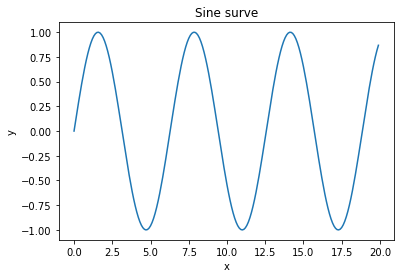

In [115]:
plt.plot(xs_q2, ys_q2)
plt.title("Sine surve")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Question 3

Write a Python program to calculate cosine function using series expansion and plot it.

Maclauring expansion of sin(x) is

$1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + ...$

In [39]:
from sympy import Symbol
import matplotlib.pyplot as plt

In [41]:
def factorial(n):
    fact = int(1)
    for i in range(2, n + 1):
        fact = fact * i
    return fact

In [42]:
x = Symbol('x')
cosine = 1
for i in range(1, 100): 
# I chose 101 because the accuracy does not improve anymore 
# for 16 decimal places after i = 100, 
# for a sufficient range of x values.
    cosine = cosine + ((-1)**i) * (x**(2*i)) / factorial(int(2*i))

In [43]:
xs_q3 = []
ys_q3 = []
for i in range(0, 200, 1):
    n = float(i) / 10
    xs_q3.append(n)
    ys_q3.append(cosine.subs(x, n))

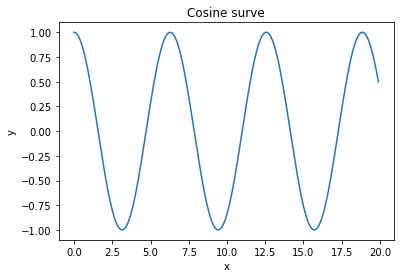

In [44]:
plt.plot(xs_q3, ys_q3)
plt.title("Cosine surve")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Question 4

Write Python program to find the sum of the series $1 + \frac{1}{2} + \frac{1}{3} + ... + \frac{1}{n}$

In [120]:
def sum(n):
    seriesSum = 0
    for i in range(1, n + 1):
        seriesSum = 1 / i
    return seriesSum

In [121]:
input("Enter n: ")
sum(int(n))

Enter n: 10


## Question 5

Find the area between the following curves:

$f(x) = \sqrt{16 - x^2}$

$g(x) = \sqrt{4 + x^2}$

In [18]:
from sympy import Symbol, sqrt, integrate, solve
import matplotlib.pyplot as plt

In [6]:
x = Symbol('x')
f = sqrt(16 - x**2)
g = sqrt(4 + x**2)

Note that if x < -4 or x > 4, then f becomes complex. Hence, the domain of the function is [-4, 4]

In [7]:
xs_q5 = []
ys_q5_f = []
ys_q5_g = []
for i in range(-40, 40): # Because they will be divided by 10...
    n = float(i) / 10 # Making the separation between x values 0.1, so the graph is smooth
    xs_q5.append(n)
    ys_q5_f.append(float(f.subs(x, n)))
    ys_q5_g.append(float(g.subs(x, n)))

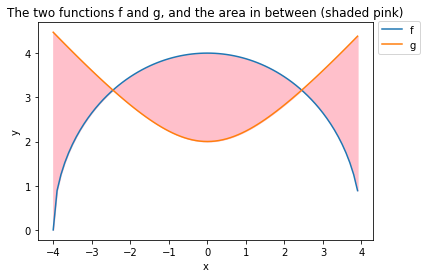

In [50]:
plt.plot(xs_q5, ys_q5_f, xs_q5, ys_q5_g)
plt.fill_between(xs_q5, ys_q5_f, ys_q5_g, color = "pink")
plt.title("The two functions f and g, and the area in between (shaded pink)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["f", "g"], bbox_to_anchor = (1, 1.03))
plt.show()

Finding the x values of the intersections points (or finding approximates that are within 0.05 units from the x-values of the intersection points)...

### Method 1 (less accurate)

In [38]:
intersections = []
flag = 2
upper = len(xs_q5)
for i in range(0, upper):
    if ys_q5_f[i] == ys_q5_g[i]:
        intersections.append(xs_q5[i])
    elif ys_q5_f[i] > ys_q5_g[i]:
        if flag == 0: # Curves must have crossed if this is the case
            intersections.append((xs_q5[i] + xs_q5[i - 1]) / 2) 
            # The midpoint between the last x and the current x to make the approximation closer, since the x-value of the intersection is in between
        flag = 1
    elif ys_q5_f[i] < ys_q5_g[i]:
        if flag == 1: # Curves must have crossed if this is the case
            intersections.append((xs_q5[i] + xs_q5[i - 1]) / 2)
            # The midpoint between the last x and the current x to make the approximation closer, since the x-value of the intersection is in between
        flag = 0

The x-values at the intersections are approximately as follows...

In [10]:
intersections

[-2.45, 2.45]

### Method 2 (more accurate)

This method uses the fact that f - g = 0 at their intersections.

In [45]:
intersections = solve(f - g, x)

In [46]:
intersections

[-sqrt(6), sqrt(6)]

## Validation and final result...

To visually confirm intersections...

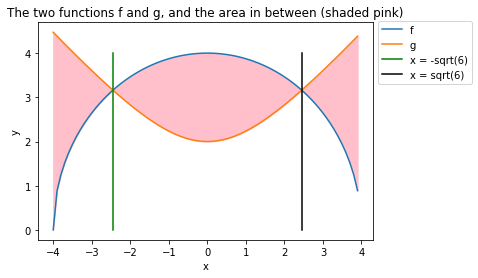

In [63]:
plt.plot(xs_q5, ys_q5_f, xs_q5, ys_q5_g)
plt.plot([intersections[0], intersections[0]], [0, 4], color = "green") # Intersection 1
plt.plot([intersections[1], intersections[1]], [0, 4], color = "black") # Intersection 2
plt.fill_between(xs_q5, ys_q5_f, ys_q5_g, color = "pink")
plt.title("The two functions f and g, and the area in between (shaded pink)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["f", "g", "x = {0}".format(intersections[0]), "x = {0}".format(intersections[1])], bbox_to_anchor = (1, 1.03))
plt.show()

Calculating the pink area using built-in functions...

In [48]:
intersectionsAndLimits = []
areasBetweenCurves = []

# Appending limits and intersection points into a new list...
intersectionsAndLimits.append(-4)
upper = len(intersections)
for i in range(0, upper):
    intersectionsAndLimits.append(intersections[i])
intersectionsAndLimits.append(4)

# Finding the various areas between the curves...
upper = len(intersectionsAndLimits) - 1
for i in range(0, upper):
    p = integrate(f, (x, intersectionsAndLimits[i], intersectionsAndLimits[i + 1]))
    q = integrate(f, (x, intersectionsAndLimits[i], intersectionsAndLimits[i + 1]))
    areasBetweenCurves.append(abs(p - q))

# Totalling the areas between the curves...
upper = len(areasBetweenCurves)
totalAreaBetweenCurves = 0
for i in range(0, upper):
    totalAreaBetweenCurves = totalAreaBetweenCurves + areasBetweenCurves[i]
print("Area between f and g is {0} square units.".format(area))

Area between f and g is 12.8361088708628 square units.
